In [28]:
import cobra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
model_fn = '../models/yeast/ecYeastGEM_8_3_4.xml'
model = cobra.io.read_sbml_model(model_fn)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-12-19


In [41]:
data_list = []
for r in model.reactions:
    if ('_REV' in r.id) and not r.id.startswith('arm'):
        prot_id, kcat = has_prot(r)
        if prot_id:
            forward_r_id = r.id.replace('_REV','')
            r_forward = model.reactions.get_by_id(forward_r_id)
            f_prot_id, f_kcat = has_prot(r_forward)
            if f_prot_id and (r_forward!=r.id):
                data_list.append([f_prot_id[:-3],f_kcat, kcat])

In [48]:
df = pd.DataFrame(data_list, columns = ['Protein', 'Forward kcat', 'Reverse kcat'])
df.drop_duplicates(inplace=True)

In [58]:
df['log10(Forward kcat)'] = np.log10(df['Forward kcat'])
df['log10(Reverse kcat)'] = np.log10(df['Reverse kcat'])

<Axes: xlabel='log10(Forward kcat)', ylabel='log10(Reverse kcat)'>

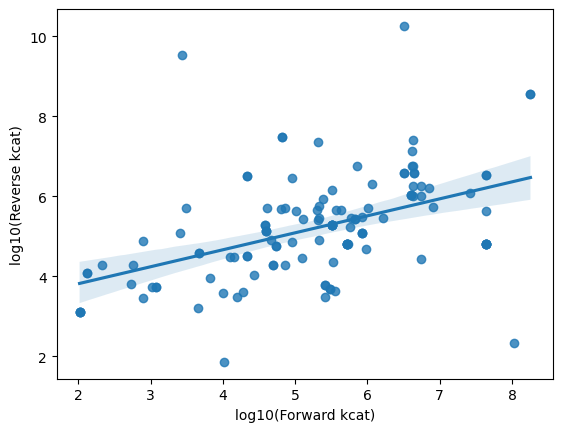

In [59]:
# sns.scatterplot(data = df.loc[df['Forward kcat']!= df['Reverse kcat']], x = 'Forward kcat', y = 'Reverse kcat')
# plt.semilogx()
# plt.semilogy()
sns.regplot(data = df.loc[df['Forward kcat']!= df['Reverse kcat']], x = 'log10(Forward kcat)', y = 'log10(Reverse kcat)')

In [8]:
model.metabolites.p

{<Metabolite s_0372[m] at 0x2a39ed510>: -1.0,
 <Metabolite s_0532[m] at 0x2a3af2610>: -1.0,
 <Metabolite s_0376[m] at 0x2a39edd90>: 1.0,
 <Metabolite s_1845[m] at 0x2a3a54410>: 1.0}

In [26]:
def has_prot(r):
    for m, coeff in r.metabolites.items():
        if m.id.startswith('prot'):
            kcat = -1/coeff
            return m.id, kcat
    return None, np.nan
        

In [9]:
for m in model.metabolites:
    if m.id.startswith('pmet') and m.id[:-3].endswith('REV'):
        rev_pmet_id = m.id
        for_pmet_id = rev_pmet_id.replace('_REV','')
        for m_id in [rev_pmet_id, for_pmet_id]:
            m = model.metabolites.get_by_id(m_id)
            
    

pmet_r_0018_REV[c]
pmet_r_0073_REV[c]
pmet_r_0092_REV[c]
pmet_r_0366_REV[c]
pmet_r_0483_REV[c]
pmet_r_0486_REV[c]
pmet_r_0542_REV[m]
pmet_r_0570_REV[c]
pmet_r_0761_REV[m]
pmet_r_0815_REV[c]
pmet_r_0820_REV[c]
pmet_r_0888_REV[c]
pmet_r_0893_REV[c]
pmet_r_0907_REV[c]
pmet_r_0912_REV[c]
pmet_r_1021_REV[m]
pmet_r_1031_REV[c]
pmet_r_1048_REV[c]
pmet_r_1049_REV[c]
pmet_r_1050_REV[c]
pmet_r_1084_REV[c]
pmet_r_1095_REV[c]
pmet_r_1168_REV[v]
pmet_r_4152_REV[m]
pmet_r_4156_REV[v]
pmet_r_4157_REV[c]
pmet_r_4175_REV[c]
pmet_r_4176_REV[c]
pmet_r_4177_REV[c]
pmet_r_4178_REV[c]
pmet_r_4179_REV[c]
pmet_r_4180_REV[c]
pmet_r_4183_REV[c]
pmet_r_4191_REV[c]
pmet_r_4193_REV[n]
pmet_r_4197_REV[m]
pmet_r_4200_REV[c]
pmet_r_4210_REV[c]
pmet_r_4211_REV[c]
pmet_r_4212_REV[c]
pmet_r_4225_REV[c]
pmet_r_4236_REV[c]
pmet_r_4274_REV[c]
pmet_r_4275_REV[c]
pmet_r_4326_REV[m]
pmet_r_4331_REV[c]
pmet_r_4333_REV[c]
pmet_r_4484_REV[c]


In [25]:
m.reactions

frozenset({<Reaction prot_Q04533_exchange at 0x2b5d91510>,
           <Reaction r_0815No2 at 0x2b469b5d0>,
           <Reaction r_0815_REVNo2 at 0x2b56ef710>,
           <Reaction r_4274No2 at 0x2b5582a90>,
           <Reaction r_4274_REVNo2 at 0x2b5a587d0>,
           <Reaction r_4484No3 at 0x2b560ead0>,
           <Reaction r_4484_REVNo3 at 0x2b5b40590>})

In [24]:
for r in m.reactions:
    if r.id.startswith('arm') or r.id.startswith('prot'):
        continue
    else:
        for m, coeff in r.metabolites.items():
            if m.id.startswith('prot'):
                break
        kcat = -1/coeff
        print(r.id, kcat)

r_4484_REVNo3 435596.9856688592
r_0815_REVNo2 435596.9856688592
r_4274_REVNo2 435596.9856688592
r_4484No3 435596.9856688592
r_4274No2 435596.9856688592
r_0815No2 435596.9856688592


In [19]:
for m, coeff in r.metabolites.items():
    if m.id.startswith('prot'):
        break
kcat = -1/coeff

In [20]:
kcat

435596.9856688592